In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50, DenseNet169
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
def load_data(base_dir):
    data = []
    labels = []
    
    categories = [
        'XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 
        'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST'
    ]
    
    for category in categories:
        for label in ['negative', 'positive']:
            path = os.path.join(base_dir, category)
            file_paths = glob(os.path.join(path, '**', f'*_{label}'), recursive=True)
            for file_path in file_paths:
                for img in glob(os.path.join(file_path, '*.png')):
                    data.append(img)
                    if label == 'negative':
                        labels.append('normal')
                    else:
                        labels.append('abnormal')
                    
    return pd.DataFrame({'image_path': data, 'label': labels})

# Define directories for training and validation
train_dir = 'MURA-v1.1/train'
valid_dir = 'MURA-v1.1/valid'

# Load data into dataframes for both training and validation
train_df = load_data(train_dir)
valid_df = load_data(valid_dir)

# Display the first few rows of each dataframe to verify the data loading
print(train_df.head())
print(valid_df.head())



                                          image_path   label
0  MURA-v1.1/train\XR_ELBOW\patient00011\study1_n...  normal
1  MURA-v1.1/train\XR_ELBOW\patient00011\study1_n...  normal
2  MURA-v1.1/train\XR_ELBOW\patient00011\study1_n...  normal
3  MURA-v1.1/train\XR_ELBOW\patient00026\study1_n...  normal
4  MURA-v1.1/train\XR_ELBOW\patient00026\study1_n...  normal
                                          image_path   label
0  MURA-v1.1/valid\XR_ELBOW\patient11204\study1_n...  normal
1  MURA-v1.1/valid\XR_ELBOW\patient11204\study1_n...  normal
2  MURA-v1.1/valid\XR_ELBOW\patient11205\study1_n...  normal
3  MURA-v1.1/valid\XR_ELBOW\patient11205\study1_n...  normal
4  MURA-v1.1/valid\XR_ELBOW\patient11205\study1_n...  normal


In [3]:
# ImageDataGenerator setup for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Flow from DataFrame for training
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary classification based on the string labels
)

# Flow from DataFrame for validation
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 36808 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.


C:\Users\palak\AppData\Local\Temp\ipykernel_17488\2433076441.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


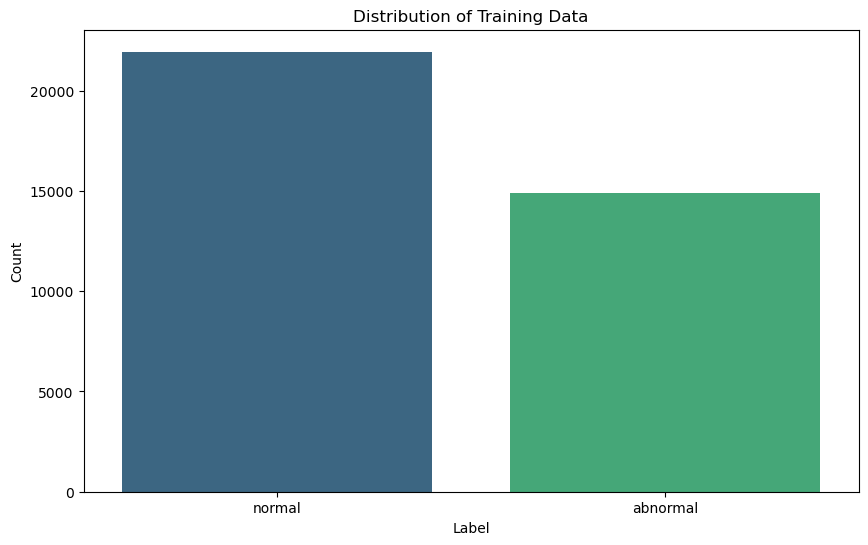

C:\Users\palak\AppData\Local\Temp\ipykernel_17488\2433076441.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


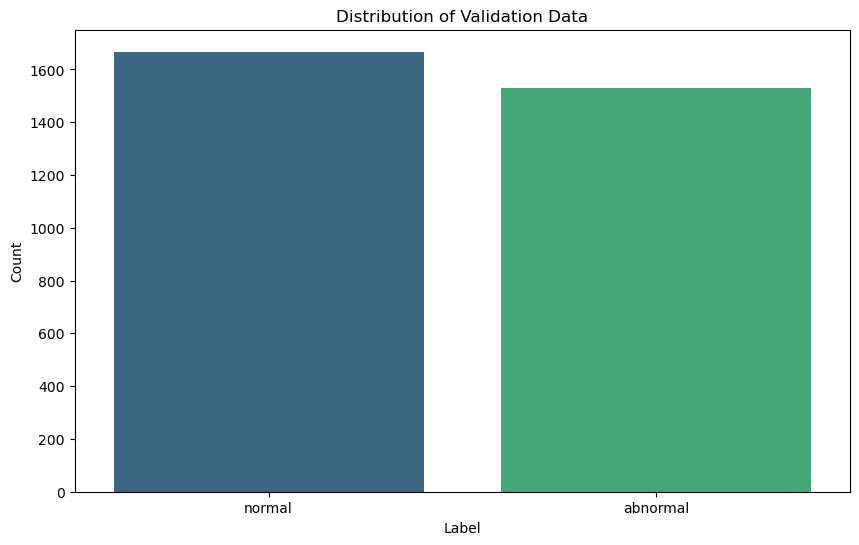

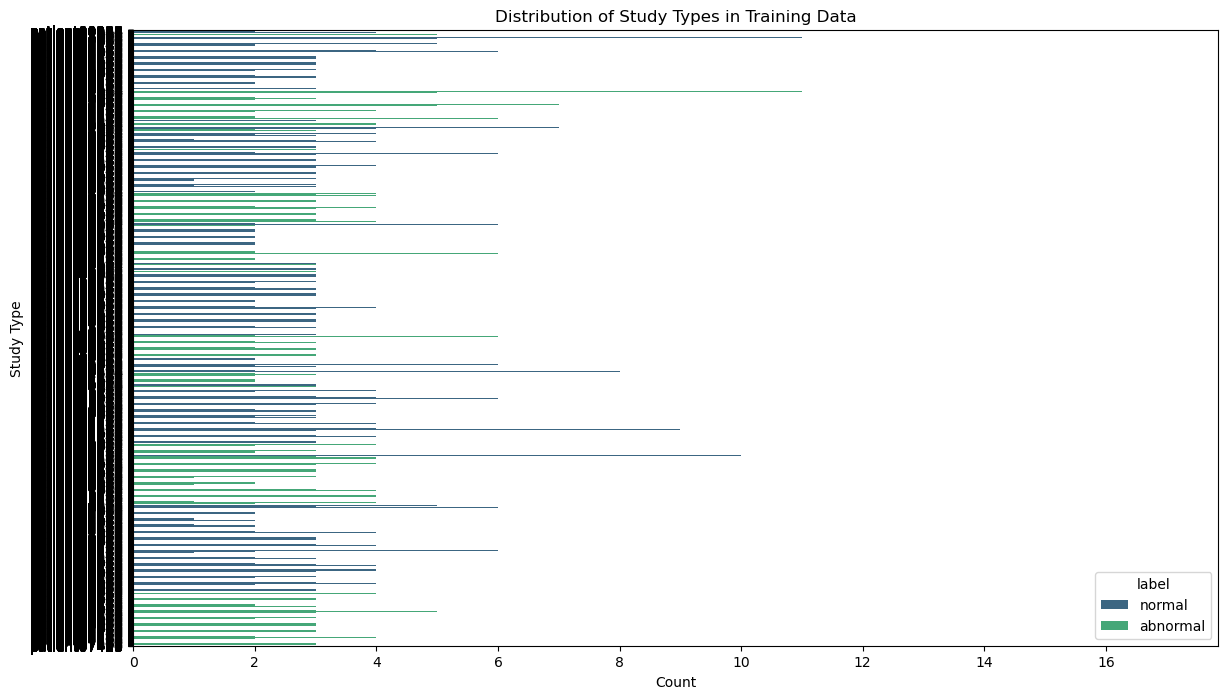

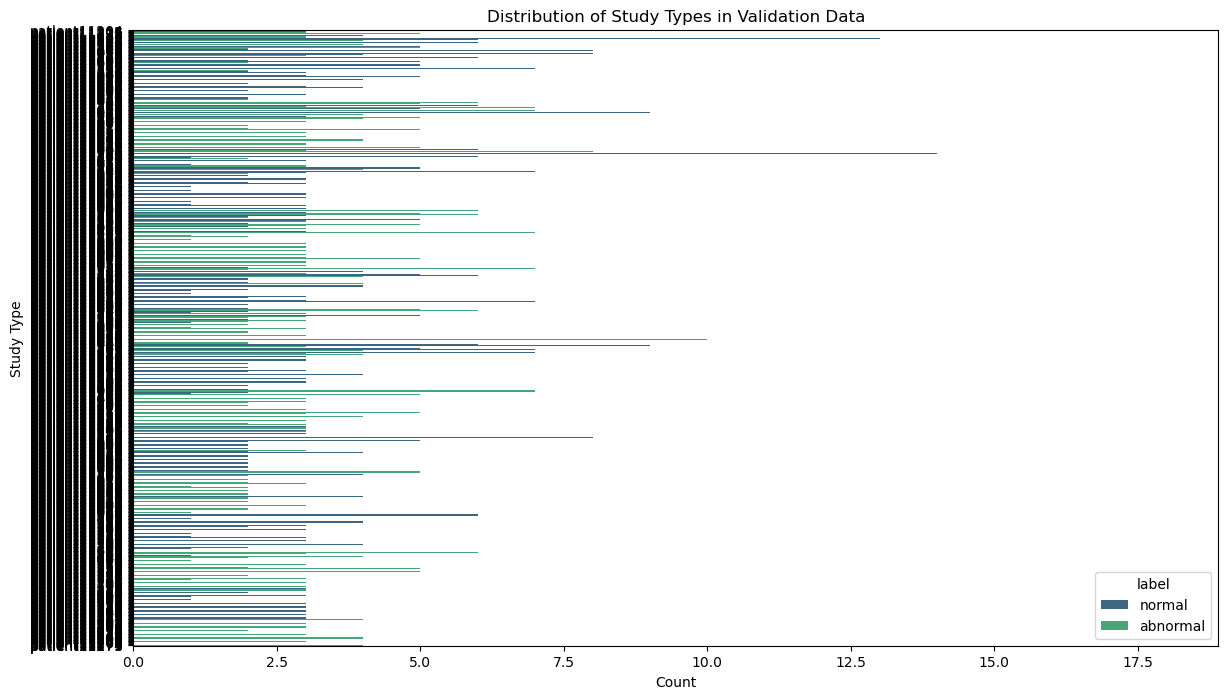

In [6]:
# Import necessary libraries for data analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the distribution of labels in the dataset
def plot_label_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='label', data=df, palette='viridis')
    plt.title(f'Distribution of {title}')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

# Function to plot the distribution of study types in the dataset
def plot_study_type_distribution(df, title):
    plt.figure(figsize=(14, 8))
    sns.countplot(y='study_type', hue='label', data=df, palette='viridis')
    plt.title(f'Distribution of Study Types in {title}')
    plt.xlabel('Count')
    plt.ylabel('Study Type')
    plt.show()

# Adding a new column 'study_type' to the dataframes based on the image paths
train_df['study_type'] = train_df['image_path'].apply(lambda x: x.split(os.sep)[-3])
valid_df['study_type'] = valid_df['image_path'].apply(lambda x: x.split(os.sep)[-3])

# Plot the distribution of labels in the training and validation datasets
plot_label_distribution(train_df, 'Training Data')
plot_label_distribution(valid_df, 'Validation Data')

# Plot the distribution of study types in the training and validation datasets
plot_study_type_distribution(train_df, 'Training Data')
plot_study_type_distribution(valid_df, 'Validation Data')


C:\Users\palak\AppData\Local\Temp\ipykernel_17488\1262642603.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_label_distribution.index, y=train_label_distribution.values, palette='viridis')
C:\Users\palak\AppData\Local\Temp\ipykernel_17488\1262642603.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valid_label_distribution.index, y=valid_label_distribution.values, palette='viridis')


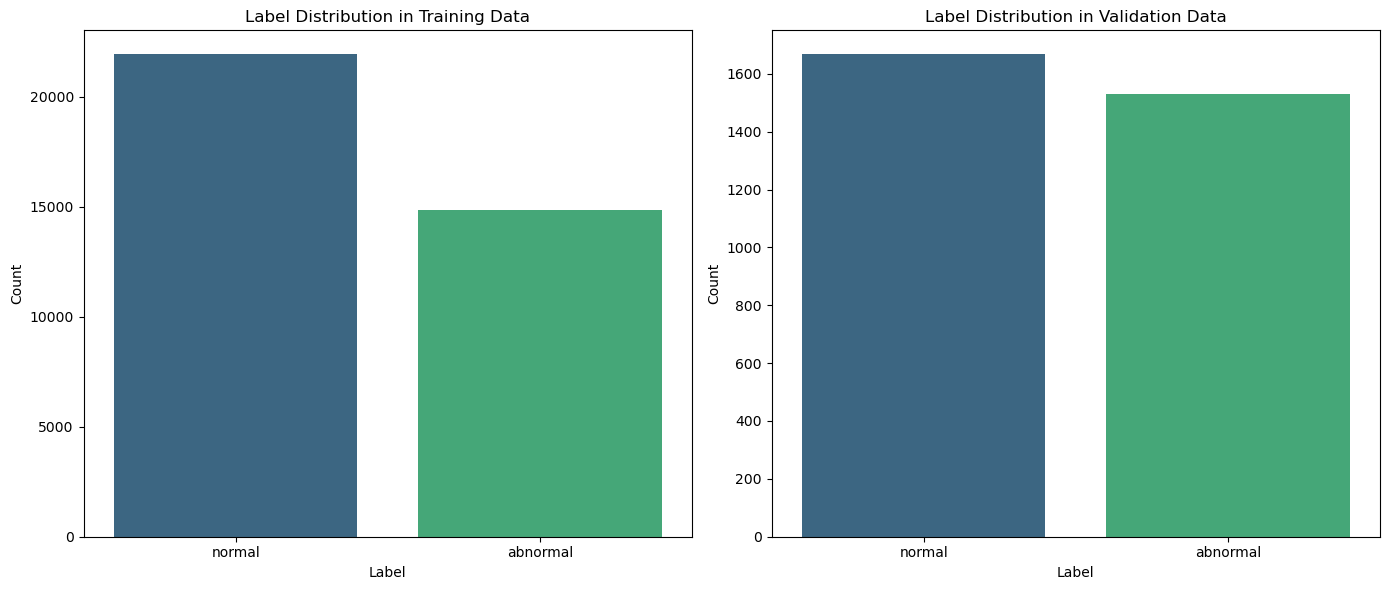

C:\Users\palak\AppData\Local\Temp\ipykernel_17488\1262642603.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_category_distribution.index, y=train_category_distribution.values, palette='plasma')
C:\Users\palak\AppData\Local\Temp\ipykernel_17488\1262642603.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valid_category_distribution.index, y=valid_category_distribution.values, palette='plasma')


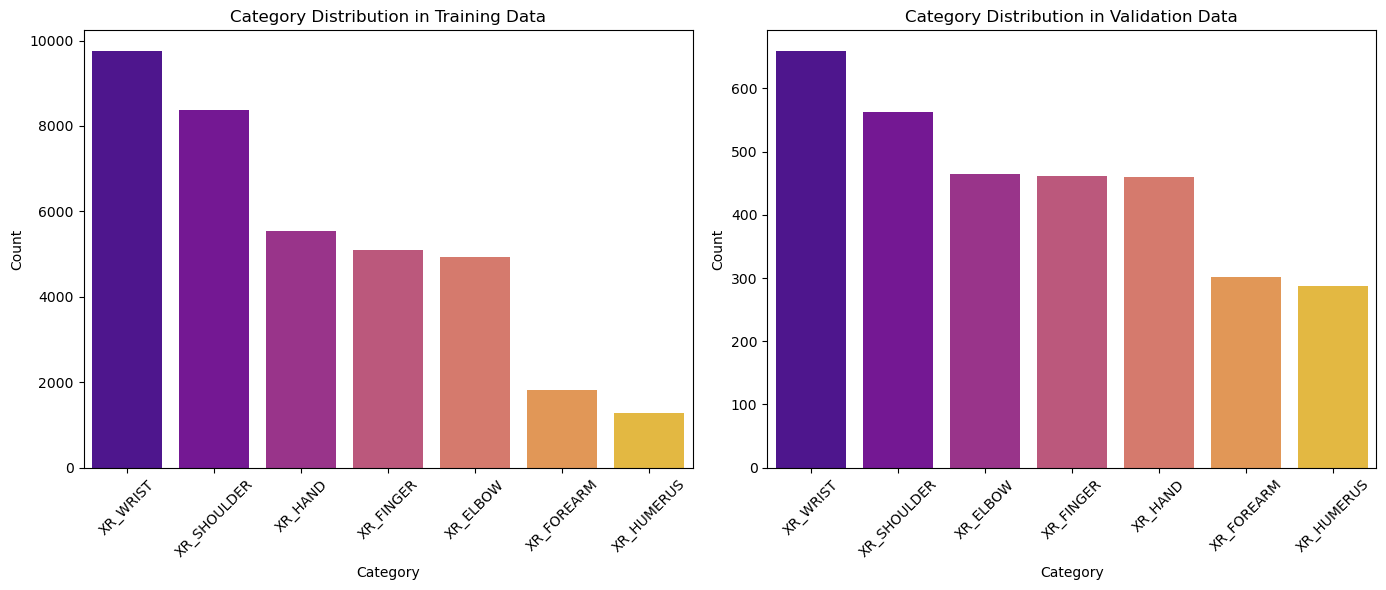

In [7]:
# Understanding the distribution of labels in the training dataset
train_label_distribution = train_df['label'].value_counts()
valid_label_distribution = valid_df['label'].value_counts()

# Plotting the distribution of labels
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=train_label_distribution.index, y=train_label_distribution.values, palette='viridis')
plt.title('Label Distribution in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=valid_label_distribution.index, y=valid_label_distribution.values, palette='viridis')
plt.title('Label Distribution in Validation Data')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Understanding the distribution of categories in the training dataset
train_category_distribution = train_df['image_path'].apply(lambda x: x.split(os.sep)[1]).value_counts()
valid_category_distribution = valid_df['image_path'].apply(lambda x: x.split(os.sep)[1]).value_counts()

# Plotting the distribution of categories
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=train_category_distribution.index, y=train_category_distribution.values, palette='plasma')
plt.title('Category Distribution in Training Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=valid_category_distribution.index, y=valid_category_distribution.values, palette='plasma')
plt.title('Category Distribution in Validation Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\palak\AppData\Local\Temp\ipykernel_17488\1007622850.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_label_distribution.index, y=train_label_distribution.values, palette='viridis')
C:\Users\palak\AppData\Local\Temp\ipykernel_17488\1007622850.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valid_label_distribution.index, y=valid_label_distribution.values, palette='viridis')
C:\Users\palak\AppData\Local\Temp\ipykernel_17488\1007622850.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_category_distribution

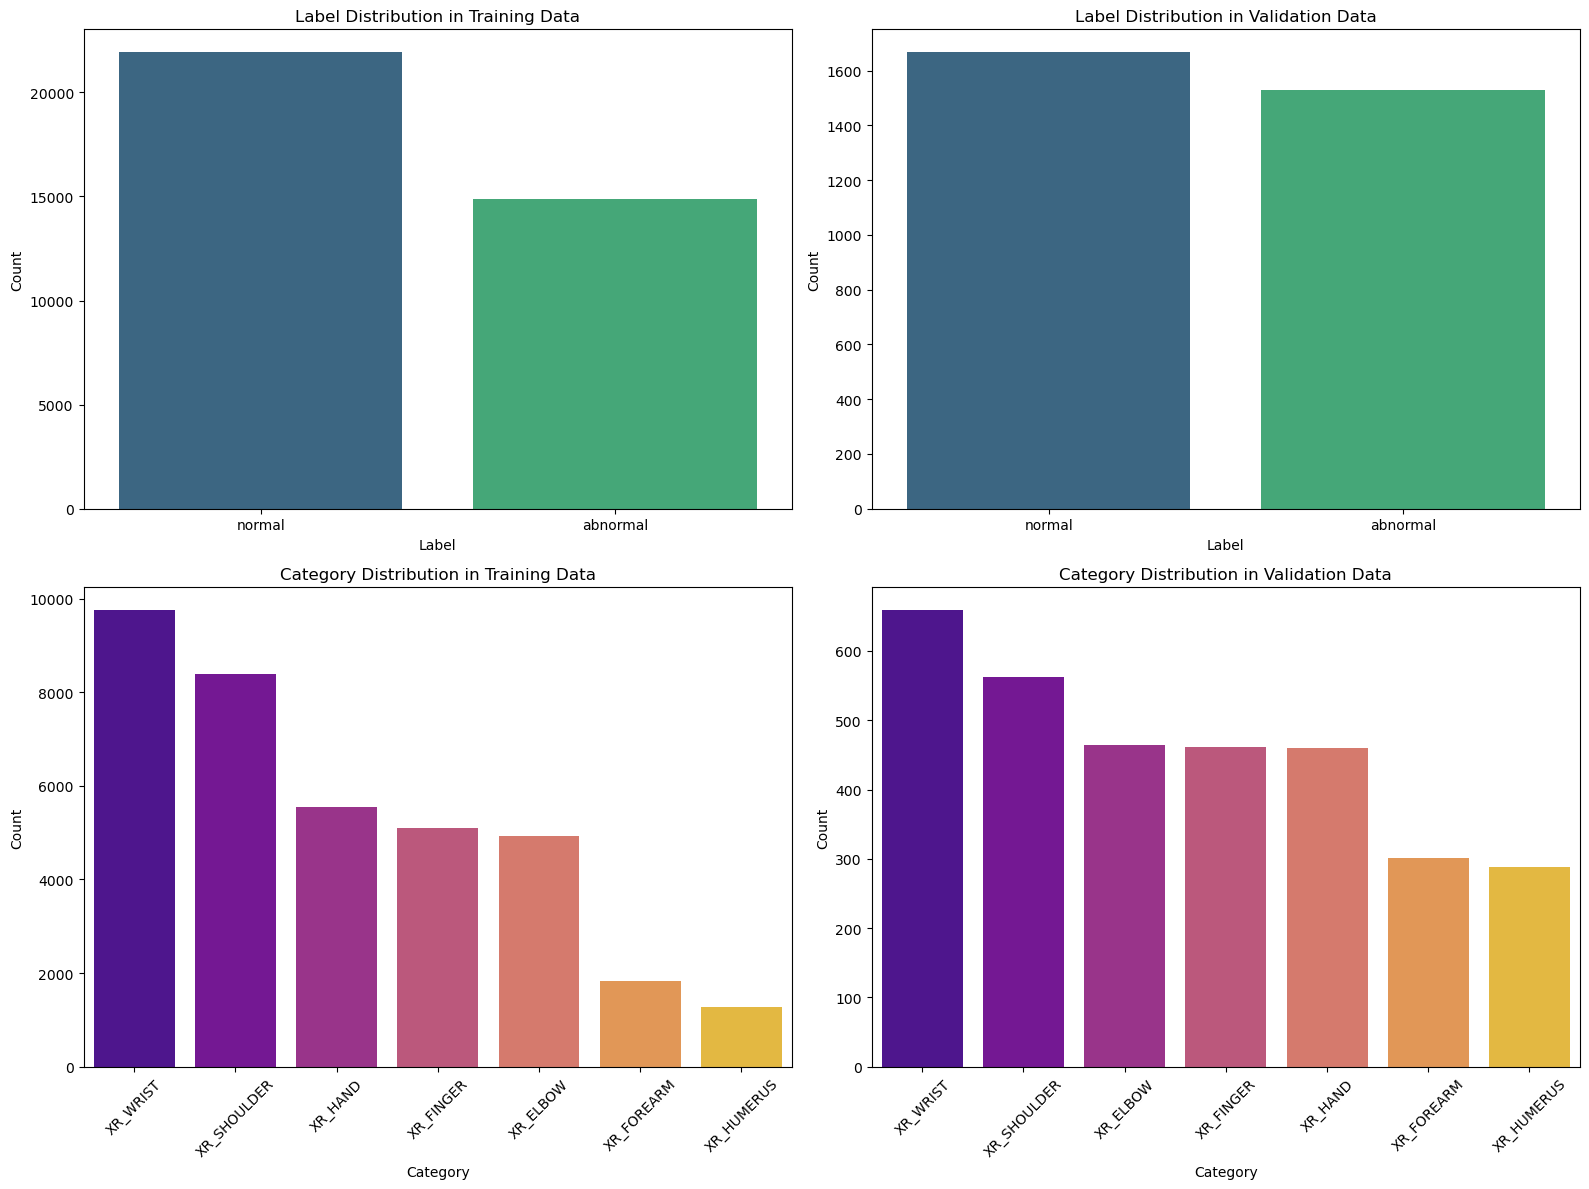

In [8]:
# Extracting the category from the image path
train_df['category'] = train_df['image_path'].apply(lambda x: x.split(os.sep)[1])
valid_df['category'] = valid_df['image_path'].apply(lambda x: x.split(os.sep)[1])

# Counting the occurrences of each label and category in the training and validation datasets
train_label_distribution = train_df['label'].value_counts()
valid_label_distribution = valid_df['label'].value_counts()

train_category_distribution = train_df['category'].value_counts()
valid_category_distribution = valid_df['category'].value_counts()

# Plotting the label and category distributions
plt.figure(figsize=(16, 12))

# Label distribution in training data
plt.subplot(2, 2, 1)
sns.barplot(x=train_label_distribution.index, y=train_label_distribution.values, palette='viridis')
plt.title('Label Distribution in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Label distribution in validation data
plt.subplot(2, 2, 2)
sns.barplot(x=valid_label_distribution.index, y=valid_label_distribution.values, palette='viridis')
plt.title('Label Distribution in Validation Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Category distribution in training data
plt.subplot(2, 2, 3)
sns.barplot(x=train_category_distribution.index, y=train_category_distribution.values, palette='plasma')
plt.title('Category Distribution in Training Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Category distribution in validation data
plt.subplot(2, 2, 4)
sns.barplot(x=valid_category_distribution.index, y=valid_category_distribution.values, palette='plasma')
plt.title('Category Distribution in Validation Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


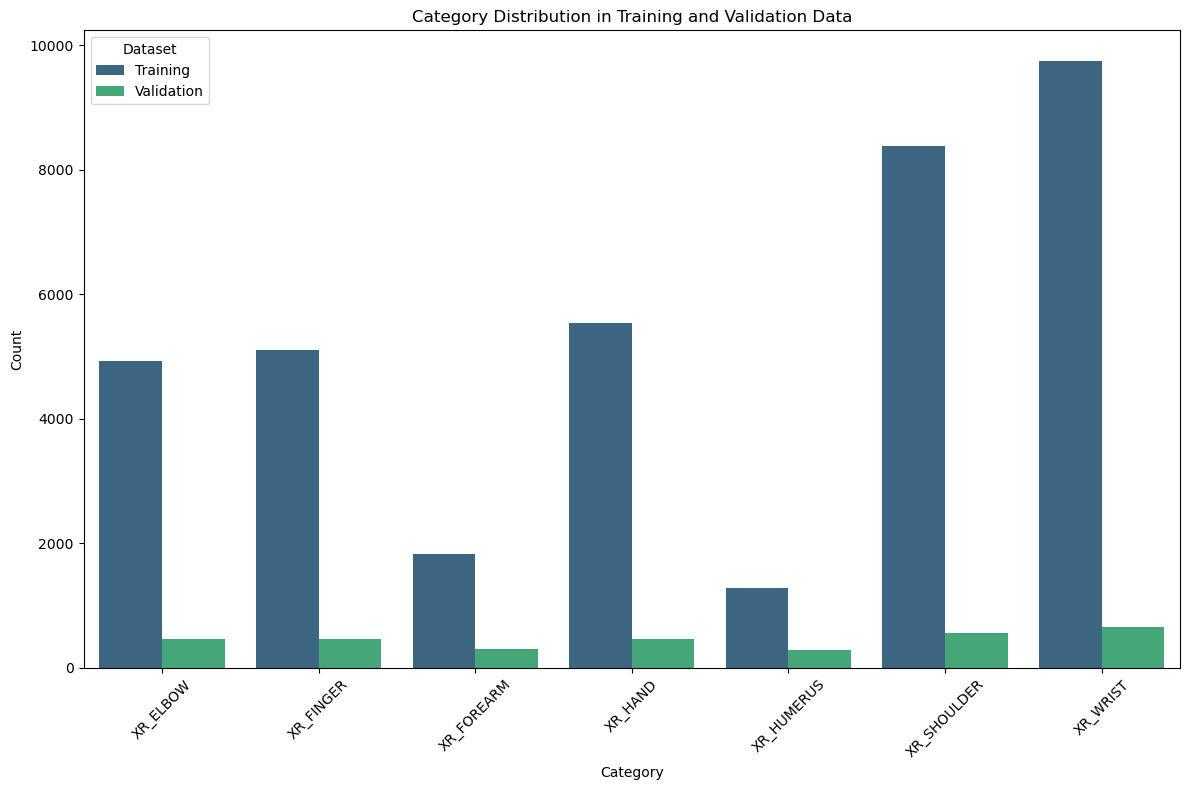

In [10]:
# Extract category information from the image paths
train_df['category'] = train_df['image_path'].apply(lambda x: x.split(os.sep)[1])
valid_df['category'] = valid_df['image_path'].apply(lambda x: x.split(os.sep)[1])

# Count the number of samples per category for both training and validation datasets
train_category_distribution = train_df['category'].value_counts().sort_index()
valid_category_distribution = valid_df['category'].value_counts().sort_index()

# Combine the distributions into a DataFrame
combined_df = pd.DataFrame({
    'Category': train_category_distribution.index,
    'Training': train_category_distribution.values,
    'Validation': valid_category_distribution.values
})

# Melt the DataFrame for easy plotting
combined_df_melted = combined_df.melt(id_vars='Category', var_name='Dataset', value_name='Count')

# Plotting the distribution of categories in both training and validation datasets
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_df_melted, x='Category', y='Count', hue='Dataset', palette='viridis')

plt.title('Category Distribution in Training and Validation Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dataset')

plt.tight_layout()
plt.show()


Training Data Image Statistics Summary:
              Width        Height  Aspect Ratio  Mean Intensity  Std Intensity
count  36808.000000  36808.000000  36808.000000    36808.000000   36808.000000
mean     399.320582    491.025837      0.836399       52.471893      31.346894
std       91.215156     46.653047      0.283742       29.635543      13.093075
min       89.000000    132.000000      0.173828        0.002530       0.318558
25%      363.000000    512.000000      0.708984       36.223875      22.329440
50%      406.000000    512.000000      0.792969       46.794151      28.684430
75%      482.250000    512.000000      0.941895       57.617995      37.066591
max      512.000000    512.000000      3.878788      179.963207     109.455655
Validation Data Image Statistics Summary:
             Width       Height  Aspect Ratio  Mean Intensity  Std Intensity
count  3197.000000  3197.000000   3197.000000     3197.000000    3197.000000
mean    400.943697   488.877072      0.851538       5

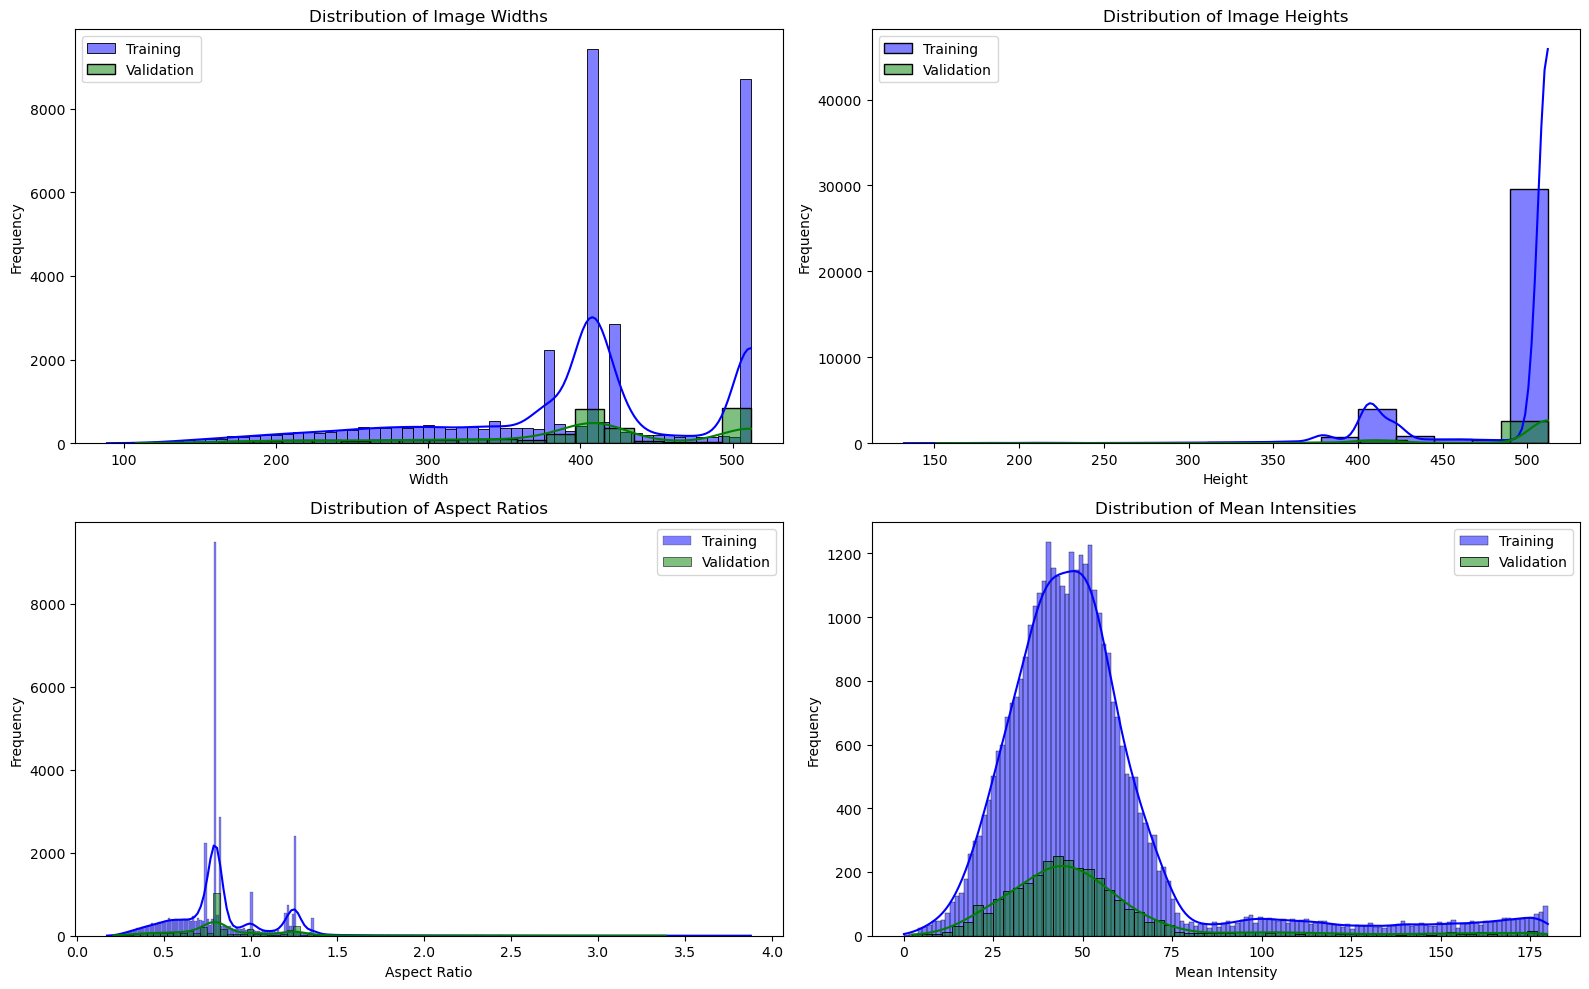

In [11]:
import cv2
import numpy as np

def analyze_images(df):
    # Initialize lists to store image statistics
    widths, heights, aspect_ratios, means, stds = [], [], [], [], []

    for img_path in df['image_path']:
        # Read the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        height, width = img.shape

        # Calculate statistics
        widths.append(width)
        heights.append(height)
        aspect_ratios.append(width / height)
        means.append(np.mean(img))
        stds.append(np.std(img))

    # Create a DataFrame for the statistics
    stats_df = pd.DataFrame({
        'Width': widths,
        'Height': heights,
        'Aspect Ratio': aspect_ratios,
        'Mean Intensity': means,
        'Std Intensity': stds
    })
    
    return stats_df

# Analyze training images
train_stats_df = analyze_images(train_df)
print("Training Data Image Statistics Summary:")
print(train_stats_df.describe())

# Analyze validation images
valid_stats_df = analyze_images(valid_df)
print("Validation Data Image Statistics Summary:")
print(valid_stats_df.describe())

# Plotting histograms of key statistics
plt.figure(figsize=(16, 10))

# Histogram of Image Widths
plt.subplot(2, 2, 1)
sns.histplot(train_stats_df['Width'], kde=True, color='blue', label='Training')
sns.histplot(valid_stats_df['Width'], kde=True, color='green', label='Validation')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.legend()

# Histogram of Image Heights
plt.subplot(2, 2, 2)
sns.histplot(train_stats_df['Height'], kde=True, color='blue', label='Training')
sns.histplot(valid_stats_df['Height'], kde=True, color='green', label='Validation')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()

# Histogram of Aspect Ratios
plt.subplot(2, 2, 3)
sns.histplot(train_stats_df['Aspect Ratio'], kde=True, color='blue', label='Training')
sns.histplot(valid_stats_df['Aspect Ratio'], kde=True, color='green', label='Validation')
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.legend()

# Histogram of Mean Intensities
plt.subplot(2, 2, 4)
sns.histplot(train_stats_df['Mean Intensity'], kde=True, color='blue', label='Training')
sns.histplot(valid_stats_df['Mean Intensity'], kde=True, color='green', label='Validation')
plt.title('Distribution of Mean Intensities')
plt.xlabel('Mean Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


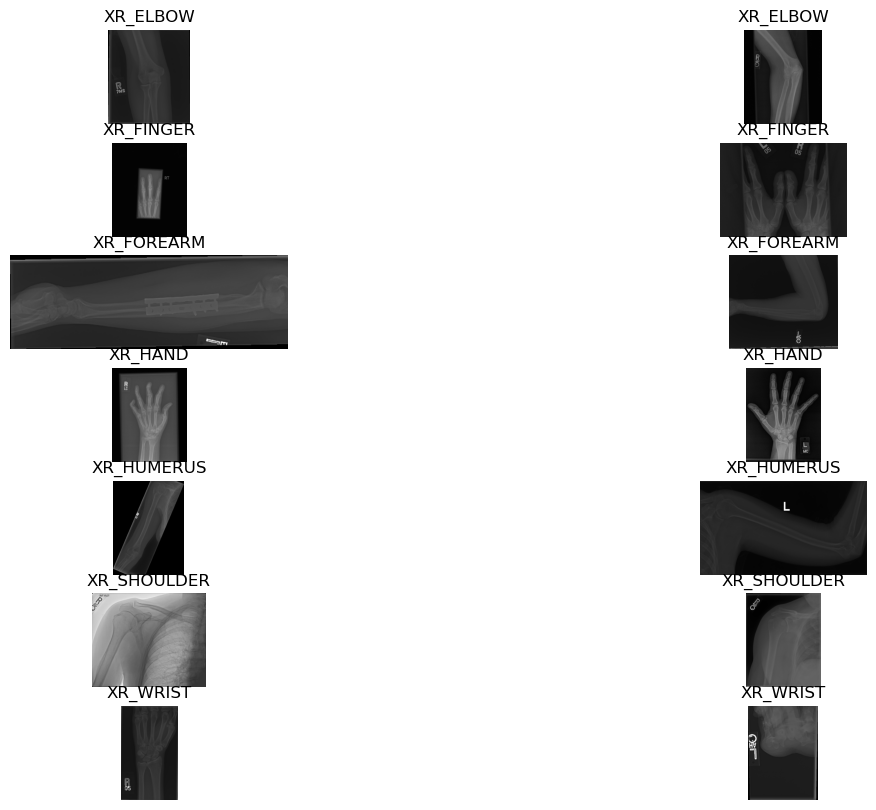

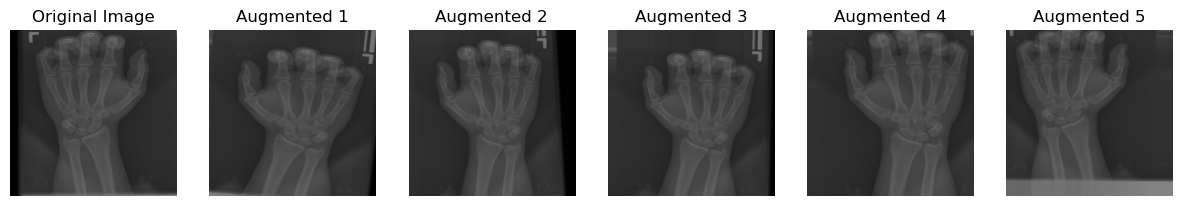

Image Size Statistics:
             Height         Width  Channels
count  36808.000000  36808.000000   36808.0
mean     491.025837    399.320582       3.0
std       46.653047     91.215156       0.0
min      132.000000     89.000000       3.0
25%      512.000000    363.000000       3.0
50%      512.000000    406.000000       3.0
75%      512.000000    482.250000       3.0
max      512.000000    512.000000       3.0


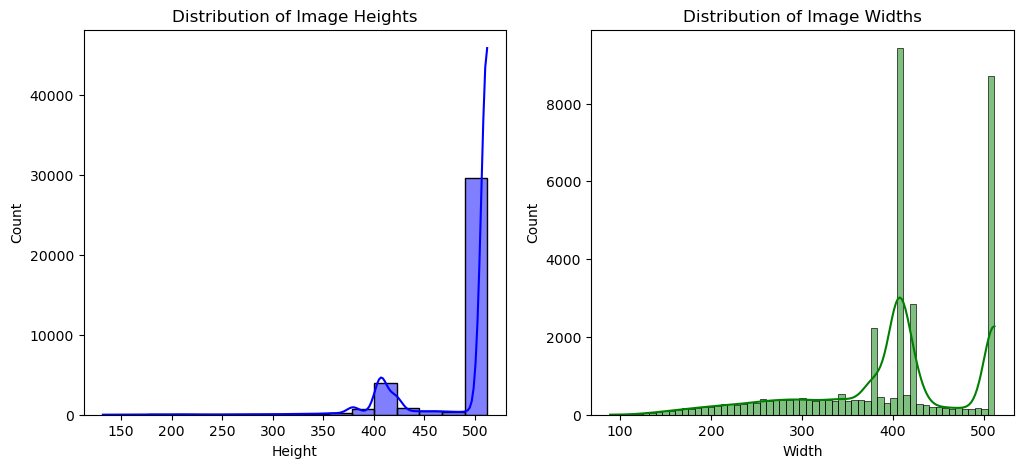

In [12]:
import cv2
import random

# Function to display a random image from each category
def display_random_images(dataframe, categories, num_images=1):
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        category_images = dataframe[dataframe['image_path'].str.contains(category)]
        for j in range(num_images):
            img_path = random.choice(category_images['image_path'].values)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(img_rgb)
            plt.title(f"{category}")
            plt.axis('off')
    plt.show()

# Display random images from each category
categories = ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']
display_random_images(train_df, categories, num_images=2)

# Function to visualize augmented images
def visualize_augmentation(generator, dataframe, category, num_images=5):
    plt.figure(figsize=(15, 10))
    category_images = dataframe[dataframe['image_path'].str.contains(category)]
    img_path = random.choice(category_images['image_path'].values)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb = cv2.resize(img_rgb, (224, 224))  # Resize to the target size

    # Create augmented images
    augmented_images = [generator.random_transform(img_rgb) for _ in range(num_images)]
    
    # Plot original and augmented images
    plt.subplot(1, num_images + 1, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    for i in range(num_images):
        plt.subplot(1, num_images + 1, i + 2)
        plt.imshow(augmented_images[i])
        plt.title(f'Augmented {i+1}')
        plt.axis('off')

    plt.show()

# Visualize image augmentations for a specific category
visualize_augmentation(train_datagen, train_df, 'XR_WRIST', num_images=5)

# Function to analyze image properties
def analyze_image_properties(dataframe):
    image_shapes = []
    for img_path in dataframe['image_path'].values:
        img = cv2.imread(img_path)
        image_shapes.append(img.shape)
    
    image_shapes_df = pd.DataFrame(image_shapes, columns=['Height', 'Width', 'Channels'])
    
    # Display general statistics
    print("Image Size Statistics:")
    print(image_shapes_df.describe())

    # Plot distribution of image heights and widths
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(image_shapes_df['Height'], kde=True, color='blue')
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    
    plt.subplot(1, 2, 2)
    sns.histplot(image_shapes_df['Width'], kde=True, color='green')
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width')
    
    plt.show()

# Analyze image properties for the training set
analyze_image_properties(train_df)


Image Complexity Statistics:
          entropy  edge_variance
count  200.000000     200.000000
mean    15.109780       0.001598
std      0.523818       0.001443
min     11.994451       0.000049
25%     14.910762       0.000666
50%     15.264559       0.001102
75%     15.497230       0.001968
max     15.602150       0.008093


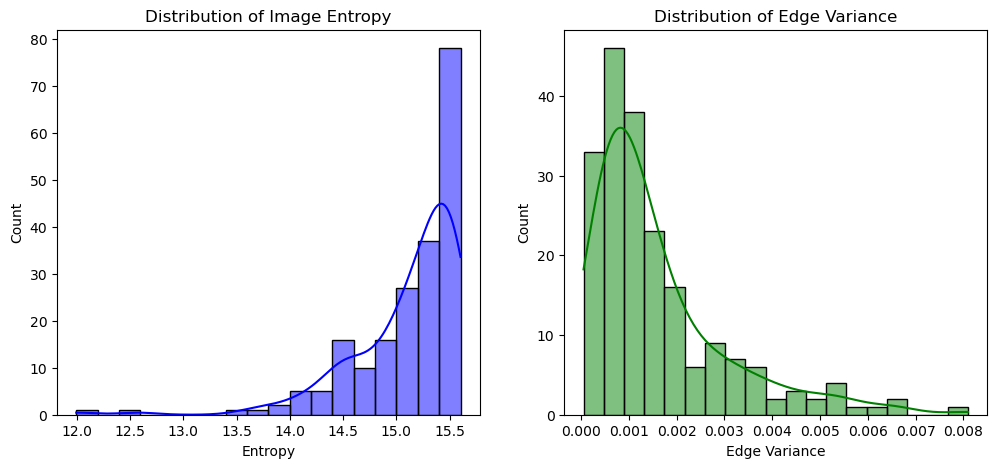

In [13]:
from skimage import filters
from skimage.color import rgb2gray
from scipy.stats import entropy

# Function to calculate image complexity using edge detection (Sobel filter) and entropy
def calculate_image_complexity(image):
    # Convert the image to grayscale
    gray_image = rgb2gray(image)
    
    # Apply Sobel filter to detect edges
    edges = filters.sobel(gray_image)
    
    # Calculate entropy of the grayscale image
    image_entropy = entropy(gray_image.ravel(), base=2)
    
    # Calculate the variance of edge magnitudes as a measure of complexity
    edge_variance = np.var(edges)
    
    return image_entropy, edge_variance

# Function to perform image complexity analysis on a subset of the dataset
def analyze_dataset_complexity(dataframe, sample_size=100):
    sample_images = dataframe.sample(sample_size)['image_path'].values
    complexities = []

    for img_path in sample_images:
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))  # Resize to a consistent size
        
        # Calculate image complexity
        img_entropy, img_edge_variance = calculate_image_complexity(img_rgb)
        complexities.append({'entropy': img_entropy, 'edge_variance': img_edge_variance})

    complexities_df = pd.DataFrame(complexities)
    
    # Display general statistics
    print("Image Complexity Statistics:")
    print(complexities_df.describe())

    # Plotting the complexity measures
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(complexities_df['entropy'], kde=True, color='blue')
    plt.title('Distribution of Image Entropy')
    plt.xlabel('Entropy')

    plt.subplot(1, 2, 2)
    sns.histplot(complexities_df['edge_variance'], kde=True, color='green')
    plt.title('Distribution of Edge Variance')
    plt.xlabel('Edge Variance')

    plt.show()

# Analyze image complexity for a sample of the training set
analyze_dataset_complexity(train_df, sample_size=200)


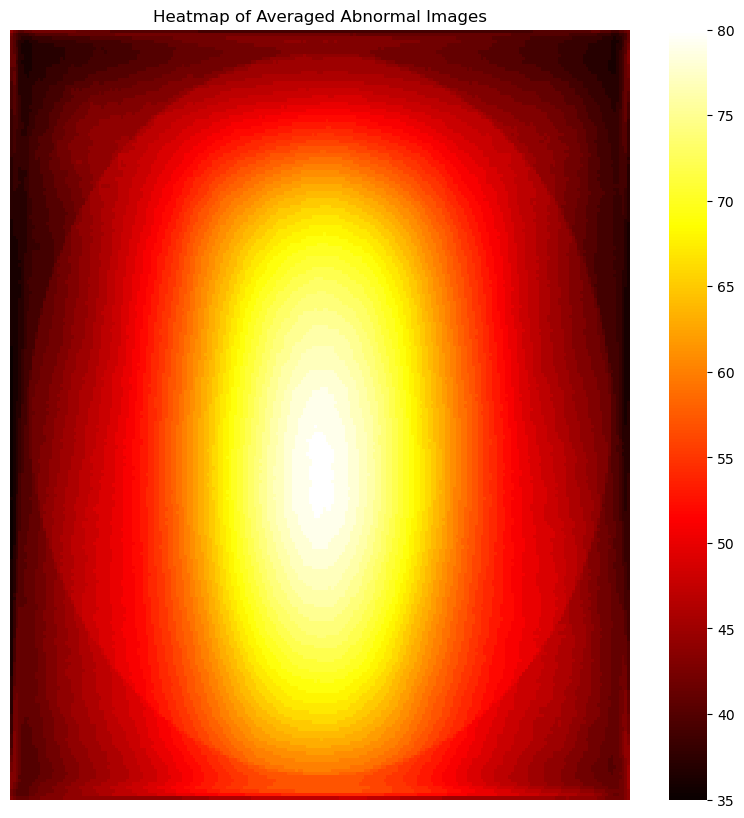

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load and resize images
def load_and_resize_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, target_size)
        images.append(img_resized)
    return np.array(images)

# Function to create a heatmap of averaged abnormal images
def create_abnormality_heatmap(dataframe, label='abnormal', target_size=(224, 224)):
    # Filter for abnormal images
    abnormal_images = dataframe[dataframe['label'] == label]['image_path'].values
    
    # Load and resize images
    abnormal_images_array = load_and_resize_images(abnormal_images, target_size)
    
    # Average the images by computing the mean across all images
    avg_image = np.mean(abnormal_images_array, axis=0)
    
    # Convert the average image to grayscale for heatmap visualization
    avg_image_gray = cv2.cvtColor(avg_image.astype(np.uint8), cv2.COLOR_RGB2GRAY)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(avg_image_gray, cmap='hot', cbar=True)
    plt.title('Heatmap of Averaged Abnormal Images')
    plt.axis('off')
    plt.show()

# Create heatmap for the abnormal images in the training set
create_abnormality_heatmap(train_df, label='abnormal', target_size=(224, 224))


Detected 971 outliers based on noise level.
                                              image_path  noise_level  \
97     MURA-v1.1/train\XR_ELBOW\patient01386\study1_n...    65.285741   
206    MURA-v1.1/train\XR_ELBOW\patient02582\study1_n...    70.256996   
279    MURA-v1.1/train\XR_ELBOW\patient03395\study1_n...    68.327239   
280    MURA-v1.1/train\XR_ELBOW\patient03395\study1_n...    66.421686   
285    MURA-v1.1/train\XR_ELBOW\patient03453\study1_n...    64.663939   
...                                                  ...          ...   
36713  MURA-v1.1/train\XR_WRIST\patient07402\study1_p...    98.959879   
36714  MURA-v1.1/train\XR_WRIST\patient07402\study1_p...    94.901972   
36715  MURA-v1.1/train\XR_WRIST\patient07402\study1_p...    94.729860   
36716  MURA-v1.1/train\XR_WRIST\patient07402\study1_p...    97.313357   
36717  MURA-v1.1/train\XR_WRIST\patient07402\study1_p...    91.319620   

         zscore  
97     2.602908  
206    2.980407  
279    2.833869  
280    

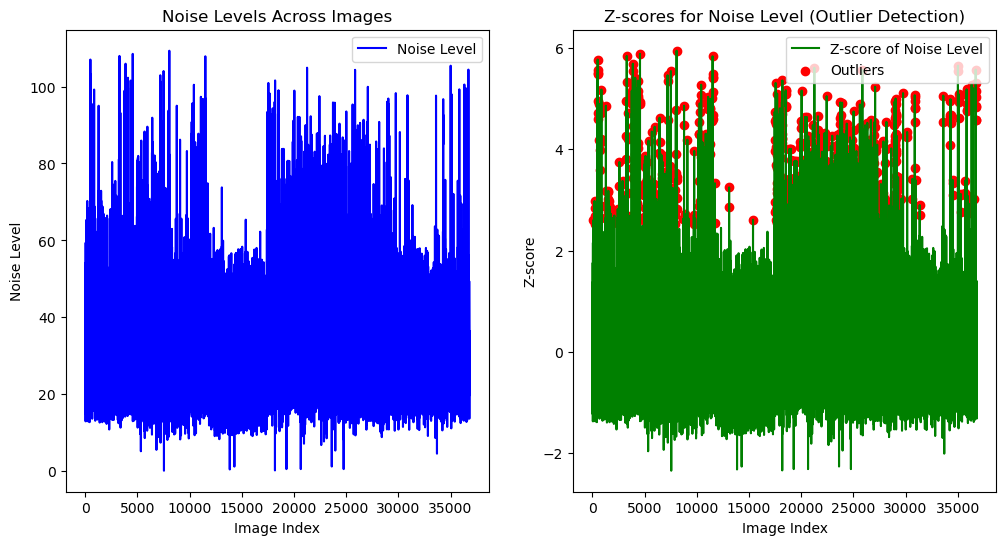

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import util
from scipy.stats import zscore

# Function to calculate noise level in an image using standard deviation of pixel values
def calculate_noise_level(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the standard deviation of pixel values as a measure of noise
    noise_level = np.std(gray_image)
    
    return noise_level

# Function to identify outliers based on noise level
def detect_noise_outliers(dataframe, threshold=2.5):
    noise_levels = []

    for img_path in dataframe['image_path'].values:
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, (224, 224))
        
        # Calculate noise level
        noise_level = calculate_noise_level(img_resized)
        noise_levels.append(noise_level)
    
    # Convert noise levels to a DataFrame for analysis
    noise_df = pd.DataFrame({'image_path': dataframe['image_path'].values, 'noise_level': noise_levels})
    
    # Calculate Z-scores to detect outliers
    noise_df['zscore'] = zscore(noise_df['noise_level'])
    
    # Identify outliers based on the Z-score threshold
    outliers = noise_df[noise_df['zscore'].abs() > threshold]
    
    return noise_df, outliers

# Function to visualize noise levels and outliers
def plot_noise_analysis(noise_df, outliers):
    plt.figure(figsize=(12, 6))
    
    # Plotting the noise levels of all images
    plt.subplot(1, 2, 1)
    plt.plot(noise_df['noise_level'], label='Noise Level', color='blue')
    plt.title('Noise Levels Across Images')
    plt.xlabel('Image Index')
    plt.ylabel('Noise Level')
    plt.legend()

    # Highlight outliers
    plt.subplot(1, 2, 2)
    plt.plot(noise_df['zscore'], label='Z-score of Noise Level', color='green')
    plt.scatter(outliers.index, outliers['zscore'], color='red', label='Outliers')
    plt.title('Z-scores for Noise Level (Outlier Detection)')
    plt.xlabel('Image Index')
    plt.ylabel('Z-score')
    plt.legend()
    
    plt.show()

# Run noise and outlier analysis on the training set
noise_df, outliers = detect_noise_outliers(train_df, threshold=2.5)

# Display outliers
print(f"Detected {len(outliers)} outliers based on noise level.")
print(outliers)

# Plot noise analysis results
plot_noise_analysis(noise_df, outliers)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━

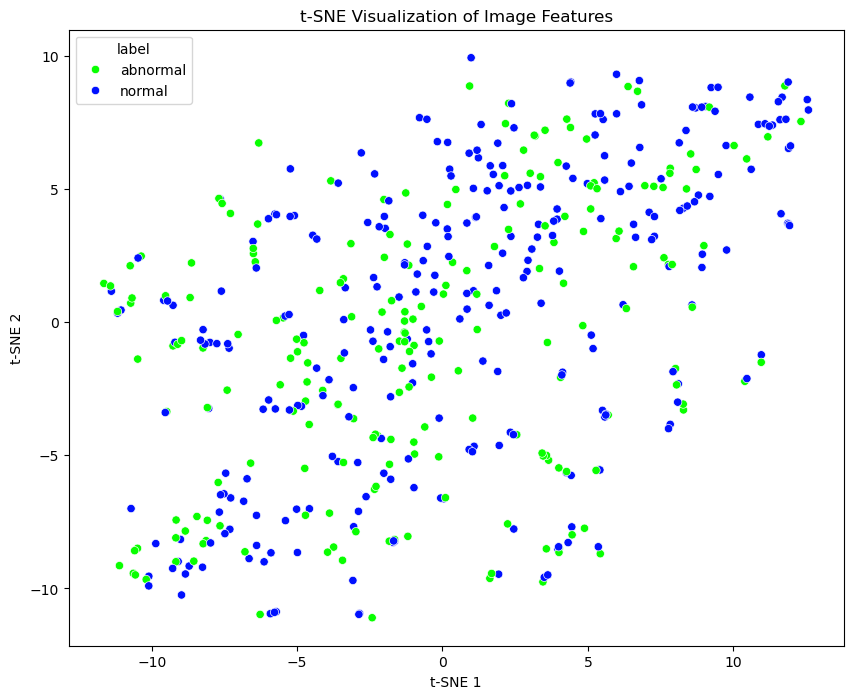

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import seaborn as sns

# Function to extract features from images using a pre-trained model
def extract_features(dataframe, model, target_size=(224, 224)):
    features = []
    labels = []
    
    for img_path in dataframe['image_path'].values:
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, target_size)
        img_array = np.expand_dims(img_resized, axis=0)
        img_array = img_array / 255.0  # Normalize the image
        
        # Extract features using the pre-trained model
        feature = model.predict(img_array)
        features.append(feature.flatten())
        
        # Append label
        labels.append(dataframe[dataframe['image_path'] == img_path]['label'].values[0])
    
    return np.array(features), np.array(labels)

# Load a pre-trained ResNet50 model without the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features from a subset of the training dataset
features, labels = extract_features(train_df.sample(500), model)

# Perform PCA to reduce dimensionality to 50 components
pca = PCA(n_components=50)
pca_result = pca.fit_transform(features)

# Perform t-SNE on the PCA result to further reduce dimensionality to 2 components for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame({'t-SNE 1': tsne_result[:, 0], 't-SNE 2': tsne_result[:, 1], 'label': labels})

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='label', data=tsne_df, palette=sns.color_palette('hsv', len(np.unique(labels))))
plt.title('t-SNE Visualization of Image Features')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━

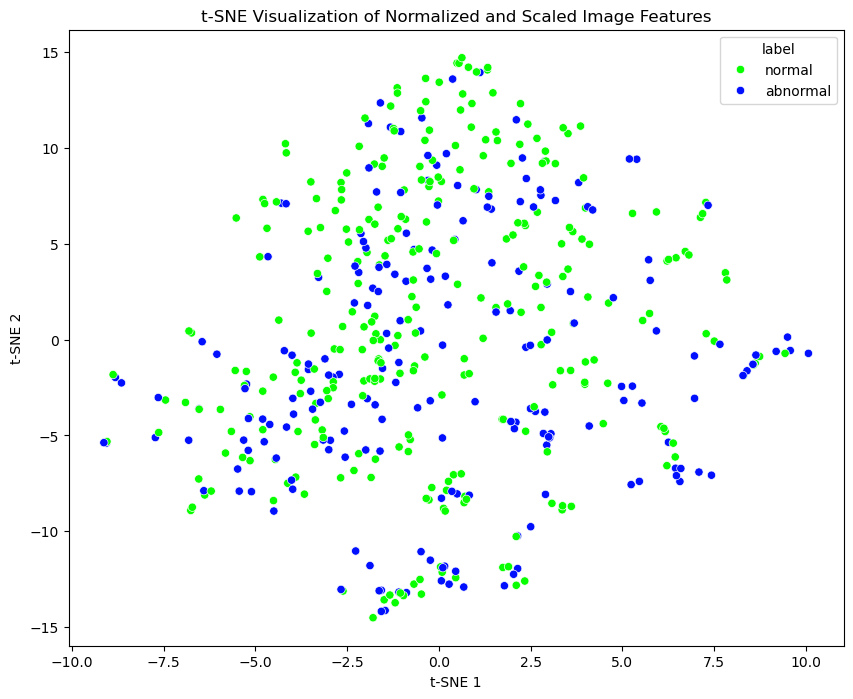

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Function to normalize and scale features
def normalize_and_scale(features, method='standard'):
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("method must be 'standard' or 'minmax'")
    
    scaled_features = scaler.fit_transform(features)
    return scaled_features

# Extract features from a subset of the training dataset
features, labels = extract_features(train_df.sample(500), model)

# Normalize and scale the features using StandardScaler
scaled_features = normalize_and_scale(features, method='standard')

# Perform PCA to reduce dimensionality to 50 components
pca = PCA(n_components=50)
pca_result = pca.fit_transform(scaled_features)

# Perform t-SNE on the PCA result to further reduce dimensionality to 2 components for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame({'t-SNE 1': tsne_result[:, 0], 't-SNE 2': tsne_result[:, 1], 'label': labels})

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='label', data=tsne_df, palette=sns.color_palette('hsv', len(np.unique(labels))))
plt.title('t-SNE Visualization of Normalized and Scaled Image Features')
plt.show()
